In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment

In [5]:
audio = AudioSegment.from_file("noisy.m4a")
audio.export("noisy.wav", format="wav")
print("Audio exported successfully to 'nNoisy.wav'")

Audio exported successfully to 'nNoisy.wav'


In [6]:
audioy, sr = librosa.load('noisy.wav', sr=22400)
print(f"Sample Rate: {sr}, Audio Shape: {audioy.shape}")

Sample Rate: 22400, Audio Shape: (275252,)


Text(0.5, 1.0, 'Waveform of noisy.wav')

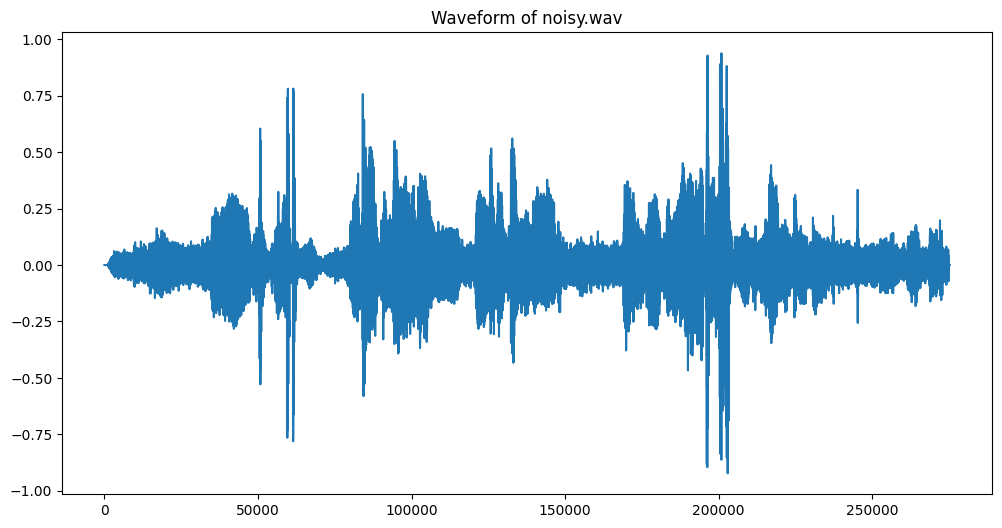

In [7]:
plt.figure(figsize=(12,6))
plt.plot(audioy)
plt.title('Waveform of noisy.wav')

In [12]:
# Removing noise from the audio
def remove_noise(audio, sr, noise_reduce_amount=0.02):
    # Perform a simple noise reduction by applying a low-pass filter
    fft_audio = np.fft.fft(audio)
    frequencies = np.fft.fftfreq(len(fft_audio), 1/sr)
    
    # Create a mask to filter out high frequencies
    mask = np.abs(frequencies) > (sr * noise_reduce_amount)
    fft_audio[mask] = 0
    
    cleaned_audio = np.fft.ifft(fft_audio).real
    return cleaned_audio
clean_audio = remove_noise(audioy, 22400)

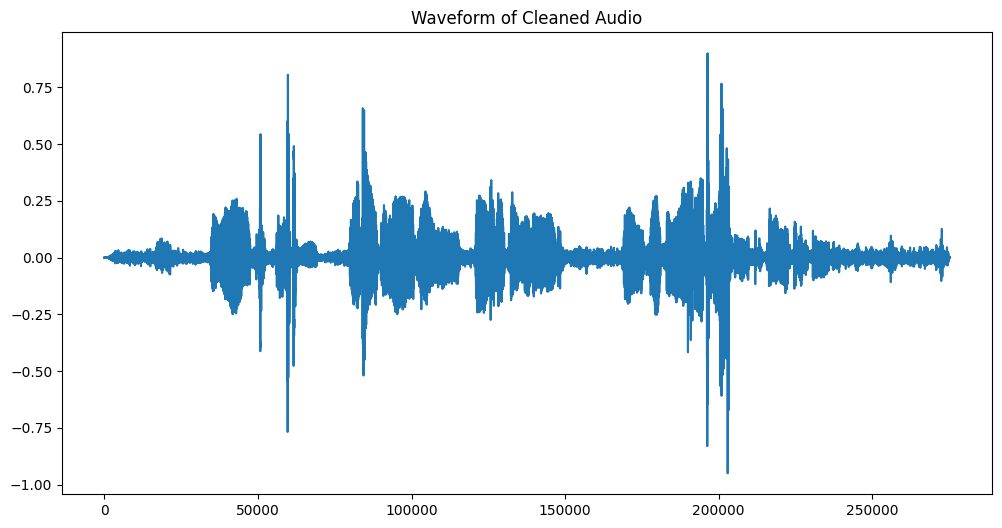

In [13]:
plt.figure(figsize=(12,6))
plt.plot(clean_audio)
plt.title('Waveform of Cleaned Audio')
plt.show()

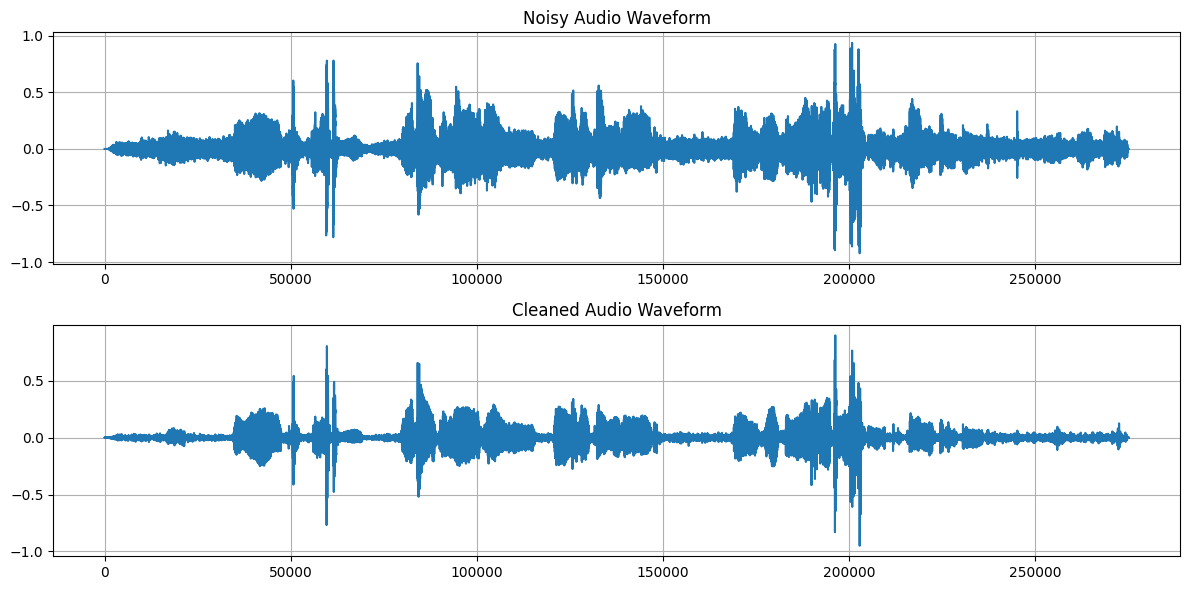

In [20]:
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(audioy)
plt.grid()
plt.title('Noisy Audio Waveform')
plt.subplot(2,1,2)
plt.plot(clean_audio)
plt.title('Cleaned Audio Waveform')
plt.tight_layout()
plt.grid()
plt.show()

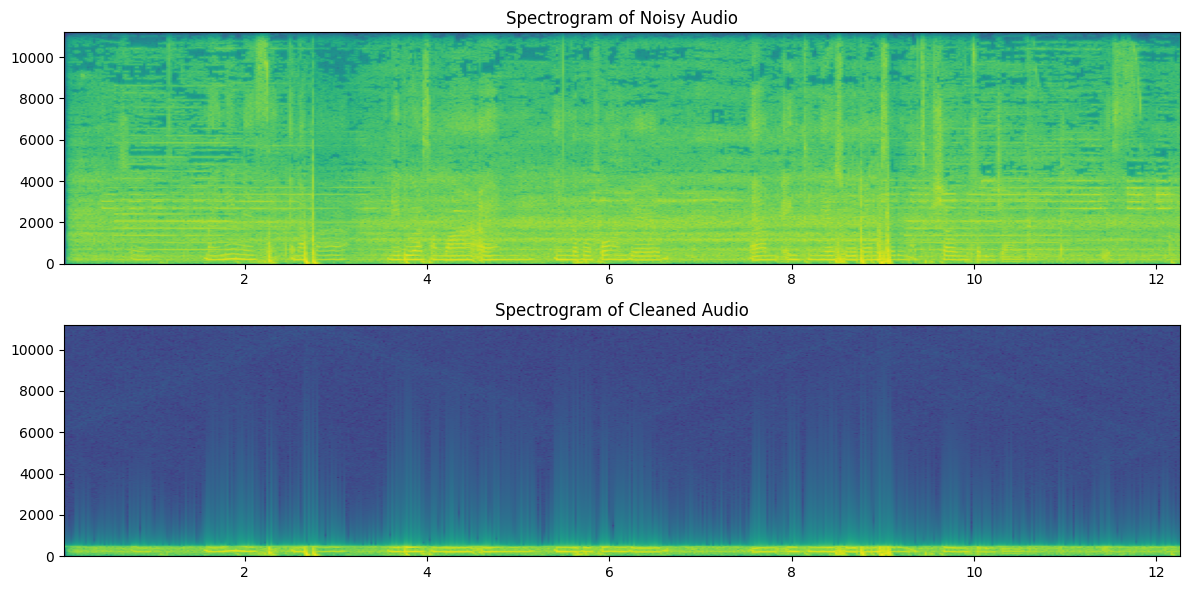

In [18]:
# Plotting spectograms
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.specgram(audioy, Fs=22400, NFFT=1024, noverlap=512)
plt.title('Spectrogram of Noisy Audio')
plt.subplot(2,1,2)
plt.specgram(clean_audio, Fs=22400, NFFT=1024, noverlap=512)
plt.title('Spectrogram of Cleaned Audio')
plt.tight_layout()
plt.show()